In [121]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [122]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)

In [123]:
x.shape

(100, 1)

In [124]:
y = y.reshape(100, 1)

In [125]:
y.shape

(100, 1)

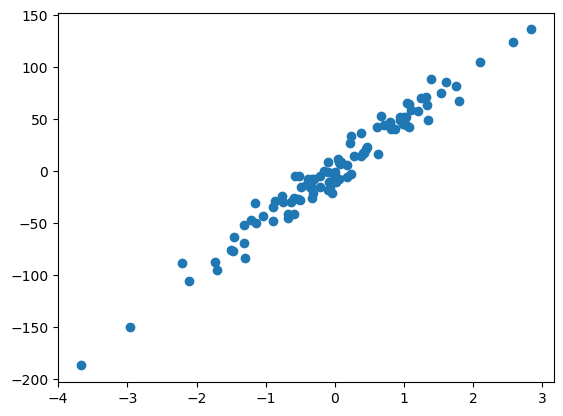

In [126]:
plt.scatter(x, y)

In [127]:
gx = np.hstack((x, np.ones(x.shape)))

In [128]:
theta = np.random.randn(2, 1)

In [129]:
theta

array([[-0.17578738],
       [-1.37616818]])

In [130]:
theta.shape

(2, 1)

In [131]:
def model(gx, theta):
    return gx.dot(theta)

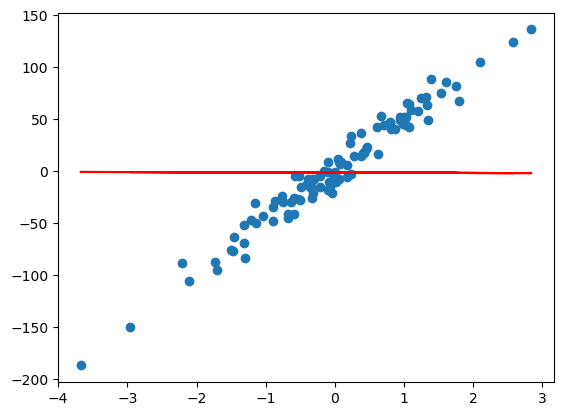

In [132]:
plt.scatter(x, y)
plt.plot(x, model(gx, theta), c="r")

In [133]:
def cost_f(gx, y, theta):
    m = len(y)
    return 1/(m*2) * np.sum((model(gx, theta) - y)**2)

In [134]:
cost_f(gx, y, theta)

1483.1408196372338

In [135]:
def grad(gx, y, theta):
    m = len(y)
    return 1/m * gx.T.dot(model(gx, theta) - y)

In [136]:
grad(gx, y, theta)

array([[-58.35291927],
       [ -3.61579676]])

In [137]:
def grad_d(gx, y, theta, l_rate, n_itr):
    cost_history = np.zeros(n_itr)
    for i in range(0, n_itr) :
        theta = theta - l_rate * grad(gx, y, theta)
        cost_history[i] = cost_f(gx, y, theta)
        return theta, cost_history

In [174]:
theta_final, cost_history = grad_d(gx, y, theta, l_rate=0.8, n_itr=1000)

In [175]:
theta_final

array([[46.50654803],
       [ 1.51646923]])

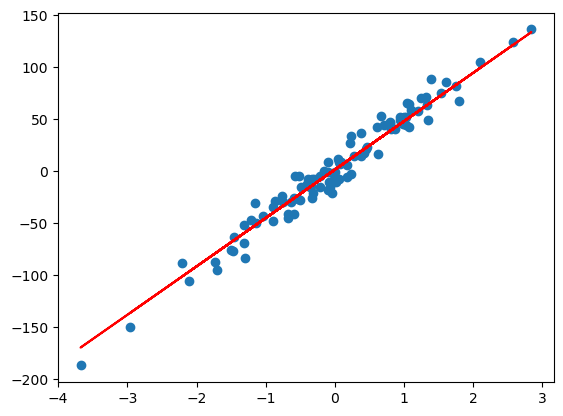

In [176]:
prediction = model(gx, theta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c='r')

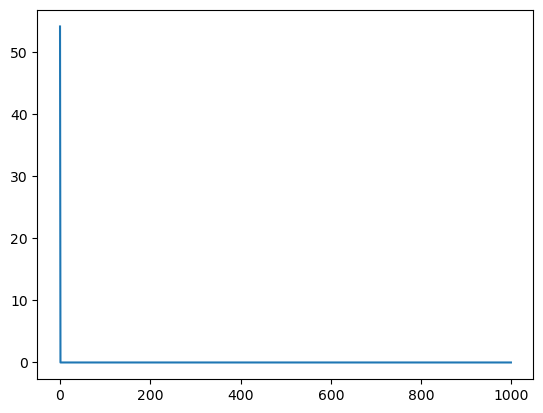

In [177]:
plt.plot(range(1000), cost_history)

In [178]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [179]:
coef_determination(y, prediction)

0.963064793086728